<a href="https://colab.research.google.com/github/yassminkhafaga/taskNLP/blob/main/taskNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load IMDB dataset
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)  # Keep only the top 10,000 words

# Set maximum review length (for padding)
max_length = 200

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (25000, 200)
Testing data shape: (25000, 200)


In [5]:
# Define the RNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Word embeddings
    keras.layers.SimpleRNN(64, return_sequences=True),  # Recurrent layer
    keras.layers.SimpleRNN(32),  # Another RNN layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 196ms/step - accuracy: 0.5102 - loss: 0.7035 - val_accuracy: 0.5416 - val_loss: 0.6827
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 193ms/step - accuracy: 0.5522 - loss: 0.6881 - val_accuracy: 0.5516 - val_loss: 0.6879
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.6515 - loss: 0.5727 - val_accuracy: 0.5117 - val_loss: 0.7180
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.6776 - loss: 0.5181 - val_accuracy: 0.5267 - val_loss: 0.8674
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 194ms/step - accuracy: 0.7339 - loss: 0.4050 - val_accuracy: 0.5271 - val_loss: 0.9731


In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5283 - loss: 0.9647
Test Accuracy: 0.5271


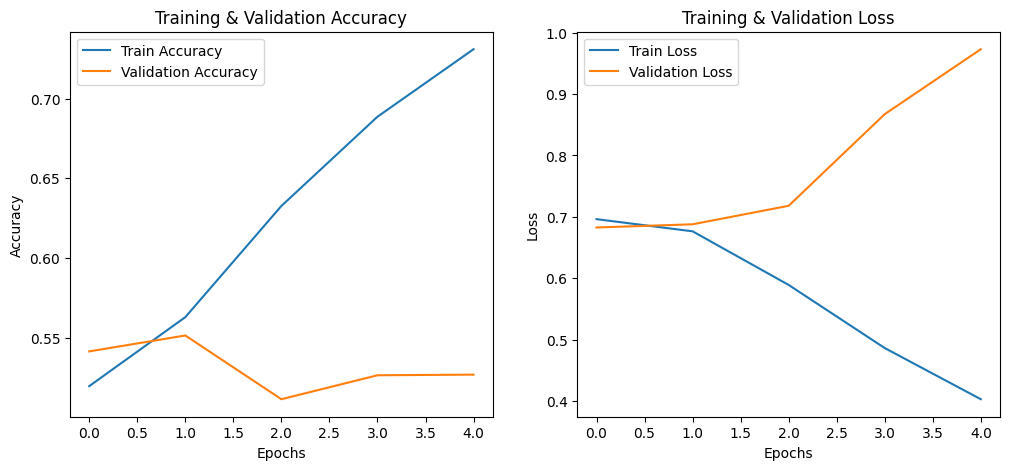

In [10]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


In [11]:
# Function to preprocess and predict sentiment
def predict_sentiment(text):
    # Load IMDB word index
    word_index = imdb.get_word_index()

    # Convert text to sequence of numbers
    words = text.lower().split()
    sequence = [word_index[word] + 3 if word in word_index else 2 for word in words]  # +3 to shift index (reserved tokens)

    # Pad sequence
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post', truncating='post')

    # Predict
    prediction = model.predict(sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"

    print(f"Review Sentiment: {sentiment} (Score: {prediction:.4f})")

# Example usage
predict_sentiment("This movie was fantastic! I really loved it.")
predict_sentiment("The film was terrible. I hated it.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Review Sentiment: Positive (Score: 0.5178)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Review Sentiment: Positive (Score: 0.5178)
